In [88]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df = pd.read_csv('housePrice.csv')
new_df = df.dropna()
dfnew = new_df.replace(',','', regex = True)
dfnew['Area'] = pd.to_numeric(dfnew['Area'], downcast='signed')
dfnew.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [90]:
for x in dfnew.index:
    if dfnew.loc[x, 'Area'] > 1000:
        dfnew.drop(x, inplace = True)

In [91]:
dfnew.describe()

,Area,Room,Price,Price(USD)
count,3451.000000,3451.000000,3.451000e+03,3.451000e+03
mean,107.176181,2.081136,5.376033e+09,1.792011e+05
std,71.183260,0.760107,8.124787e+09,2.708262e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.419500e+09,4.731667e+04
50%,90.000000,2.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,1000.000000,5.000000,9.240000e+10,3.080000e+06


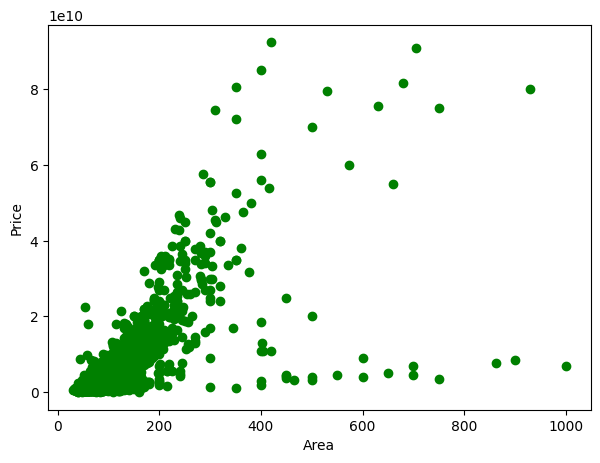

In [92]:
plt.figure(figsize=(7, 5))
plt.scatter(dfnew.Area, dfnew.Price, color='green')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

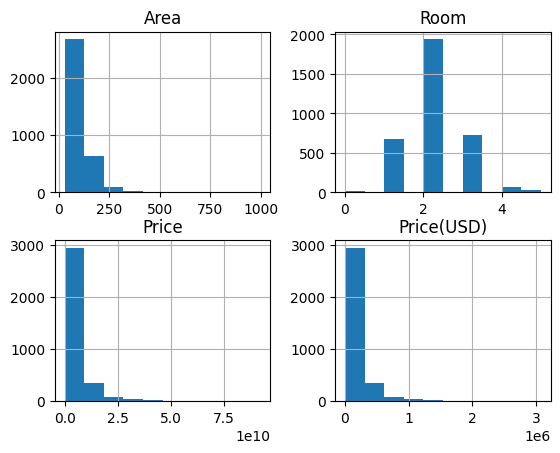

In [93]:
vis = dfnew
vis.hist()
plt.show()

In [94]:
msk = np.random.rand(len(dfnew)) < 0.8
train = dfnew[msk]
test = dfnew[~msk]

<Figure size 700x500 with 0 Axes>

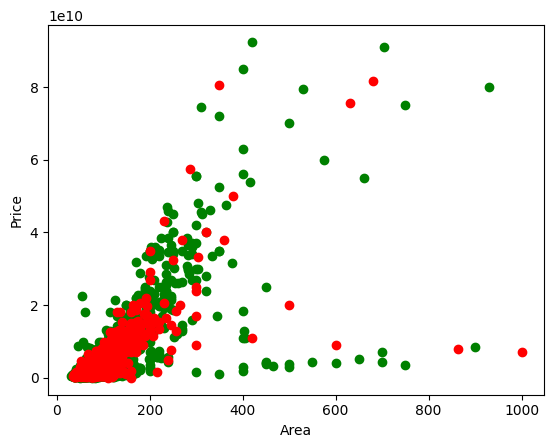

In [95]:
plt.figure(figsize=(7,5))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.Area, train.Price, color='green')
ax1.scatter(test.Area, test.Price, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [96]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])
regr.fit(train_x, train_y)

print('coefficient is ', regr.coef_)
print('intercept is ', regr.intercept_)

coefficient is  [[84729583.82616337]]
intercept is  [-3.6594447e+09]


Text(0, 0.5, 'Emission')

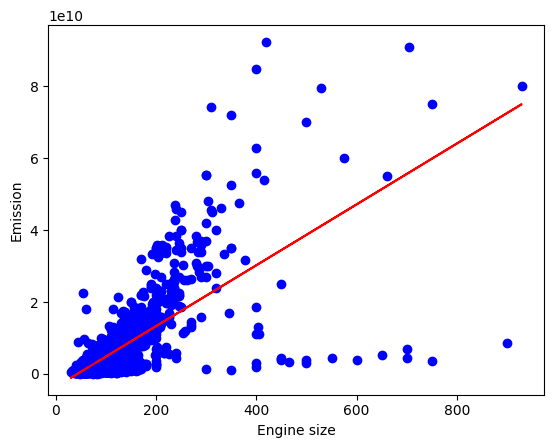

In [97]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [98]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])
y_hat = regr.predict(test_x)

print(r2_score(test_y, y_hat))

0.4094006499684012


In [100]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000e+00, 6.3000e+01, 3.9690e+03],
       [1.0000e+00, 6.0000e+01, 3.6000e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       ...,
       [1.0000e+00, 7.5000e+01, 5.6250e+03],
       [1.0000e+00, 1.0500e+02, 1.1025e+04],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [101]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print('coefficient is ', clf.coef_)
print('intercept is ', clf.intercept_)

coefficient is  [[ 0.00000000e+00  1.28552603e+08 -8.41984756e+04]]
intercept is  [-6.9828632e+09]


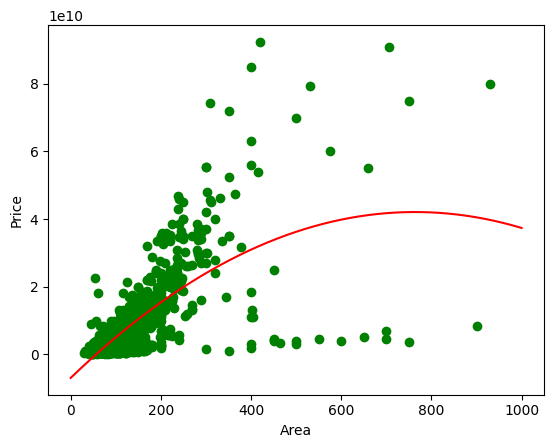

In [106]:
plt.scatter(train.Area, train.Price, color='green')
XX = np.arange(0.0, 1000.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [107]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("r2 score is", r2_score(test_y, test_y_))

r2 score is 0.5620340001867183
